In [1]:
import pandas as pd
from utils import *

In [2]:
credit = pd.read_csv(r"C:\Users\Tran Duy Anh\Documents\Danh đang học\NEU Study\Third year\First term\Data Preparation and Visualization\Final\dseb63_final_project_DP_dataset\dseb63_credit_card_balance.csv")
app_train = pd.read_csv(r"C:\Users\Tran Duy Anh\Documents\Danh đang học\NEU Study\Third year\First term\Data Preparation and Visualization\Final\dseb63_final_project_DP_dataset\dseb63_application_train.csv")

## 1. Overall 

,Attribute,Value
0,Shape,Rows: 3227965 Columns: 23
1,Numerical Columns,SK_ID_PREV MONTHS_BALANCE AMT_BALANCE AMT_CREDIT_LIMIT_ACTUAL AMT_DRAWINGS_ATM_CURRENT AMT_DRAWINGS_CURRENT AMT_DRAWINGS_OTHER_CURRENT AMT_DRAWINGS_POS_CURRENT AMT_INST_MIN_REGULARITY AMT_PAYMENT_CURRENT AMT_PAYMENT_TOTAL_CURRENT AMT_RECEIVABLE_PRINCIPAL AMT_RECIVABLE AMT_TOTAL_RECEIVABLE CNT_DRAWINGS_ATM_CURRENT CNT_DRAWINGS_CURRENT CNT_DRAWINGS_OTHER_CURRENT CNT_DRAWINGS_POS_CURRENT CNT_INSTALMENT_MATURE_CUM SK_DPD SK_DPD_DEF SK_ID_CURR
2,Categorical Columns,NAME_CONTRACT_STATUS
3,Data Types,SK_ID_PREV: int64 MONTHS_BALANCE: int64 AMT_BALANCE: float64 AMT_CREDIT_LIMIT_ACTUAL: int64 AMT_DRAWINGS_ATM_CURRENT: float64 AMT_DRAWINGS_CURRENT: float64 AMT_DRAWINGS_OTHER_CURRENT: float64 AMT_DRAWINGS_POS_CURRENT: float64 AMT_INST_MIN_REGULARITY: float64 AMT_PAYMENT_CURRENT: float64 AMT_PAYMENT_TOTAL_CURRENT: float64 AMT_RECEIVABLE_PRINCIPAL: float64 AMT_RECIVABLE: float64 AMT_TOTAL_RECEIVABLE: float64 CNT_DRAWINGS_ATM_CURRENT: float64 CNT_DRAWINGS_CURRENT: int64 CNT_DRAWINGS_OTHER_CURRENT: float64 CNT_DRAWINGS_POS_CURRENT: float64 CNT_INSTALMENT_MATURE_CUM: float64 NAME_CONTRACT_STATUS: object SK_DPD: int64 SK_DPD_DEF: int64 SK_ID_CURR: int64


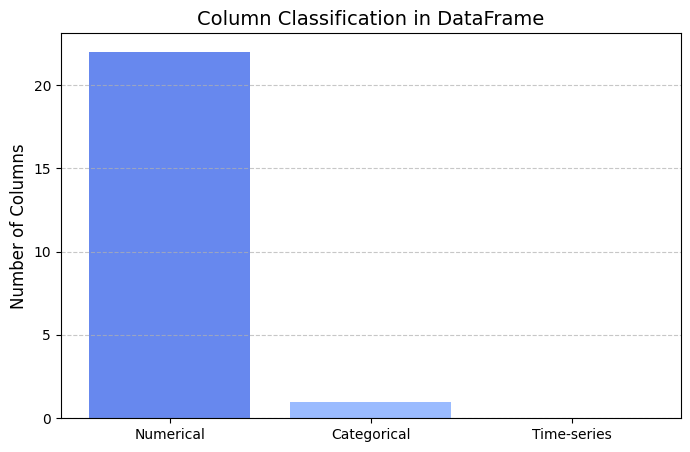

In [3]:
display_dataframe_info(credit)

#### This credit_card_balance dataset has 23 columns, in which 22 are numerical and 1 is categorical (NAME_CONTRACT_STATUS)

,Column,Missing Count,Missing Percentage (%)
9,AMT_PAYMENT_CURRENT,620093,19.21%
14,CNT_DRAWINGS_ATM_CURRENT,605754,18.77%
4,AMT_DRAWINGS_ATM_CURRENT,605754,18.77%
6,AMT_DRAWINGS_OTHER_CURRENT,605754,18.77%
7,AMT_DRAWINGS_POS_CURRENT,605754,18.77%
17,CNT_DRAWINGS_POS_CURRENT,605754,18.77%
16,CNT_DRAWINGS_OTHER_CURRENT,605754,18.77%
8,AMT_INST_MIN_REGULARITY,264384,8.19%
18,CNT_INSTALMENT_MATURE_CUM,264384,8.19%
0,SK_ID_PREV,0,0.00%


c:\Users\Tran Duy Anh\Documents\Danh đang học\NEU Study\Third year\First term\Data Preparation and Visualization\Final\final\utils.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


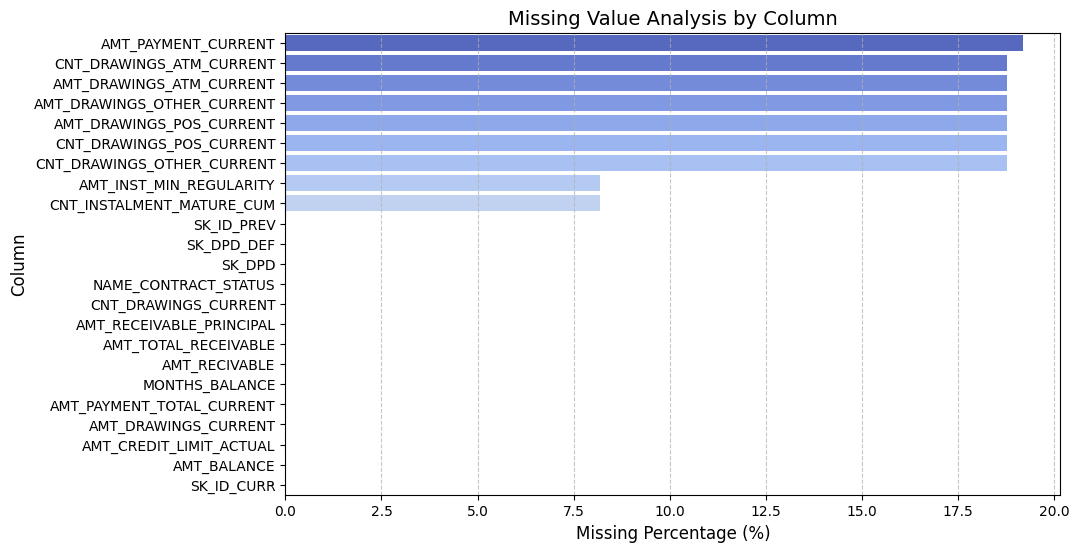

In [4]:
analyze_missing_values(credit)

#### 9 out of 23 features contain null values, and 7 of them are approximately 20%. The above null percentage table indicates that most of the null values are the information about customer drawing in each month (total drawing count, total drawing amount in each type of drawing). The two remaining features are about customer installment over the time

In [5]:
basic_statistics_summary(credit)

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3227965.00,1903894.10,536741.49,1000018.00,1431613.00,1896076.00,2369259.00,2843493.00
MONTHS_BALANCE,3227965.00,-34.72,26.64,-96.00,-56.00,-28.00,-11.00,-1.00
AMT_BALANCE,3227965.00,59073.32,106613.65,-420250.18,0.00,0.00,90405.54,1354829.26
AMT_CREDIT_LIMIT_ACTUAL,3227965.00,152953.57,163709.20,0.00,45000.00,112500.00,180000.00,1350000.00
AMT_DRAWINGS_ATM_CURRENT,2622211.00,6024.27,28421.16,-6827.31,0.00,0.00,0.00,2115000.00
AMT_DRAWINGS_CURRENT,3227965.00,7494.08,33967.43,-6211.62,0.00,0.00,0.00,2115000.00
AMT_DRAWINGS_OTHER_CURRENT,2622211.00,298.49,8396.19,0.00,0.00,0.00,0.00,1529847.00
AMT_DRAWINGS_POS_CURRENT,2622211.00,2884.15,20388.33,0.00,0.00,0.00,0.00,2060030.16
AMT_INST_MIN_REGULARITY,2963581.00,3599.68,5611.74,0.00,0.00,0.00,6750.00,202882.01
AMT_PAYMENT_CURRENT,2607872.00,10238.61,35864.33,0.00,155.70,2923.02,9000.00,4289207.45


## 2. EDA

#### Merge the target column of the application_train dataset to the credit_card_balance dataset

In [6]:
credit_app = merge_target(credit, app_train, key_col= 'SK_ID_CURR', target_col= 'TARGET')
credit_app.head()

Successfully merged 'TARGET' column into the data.


,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,TARGET
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,1.0,1,0.0,0.0,69.0,Active,0,0,87788,1.0
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,0.0,0,0.0,0.0,18.0,Active,0,0,87788,1.0
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,0.0,0,0.0,0.0,16.0,Active,0,0,87788,1.0
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,0.0,0,0.0,0.0,63.0,Active,0,0,87788,1.0
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,4.0,4,0.0,0.0,41.0,Active,0,0,87788,1.0


#### The only categorical column in this table is NAME_CONTRACT_STATUS, which has 7 unique value. In this column, most of the values are active, fews are completed. The rare categories in this column are the remaining columns with proportion are all under 5% thresholds.

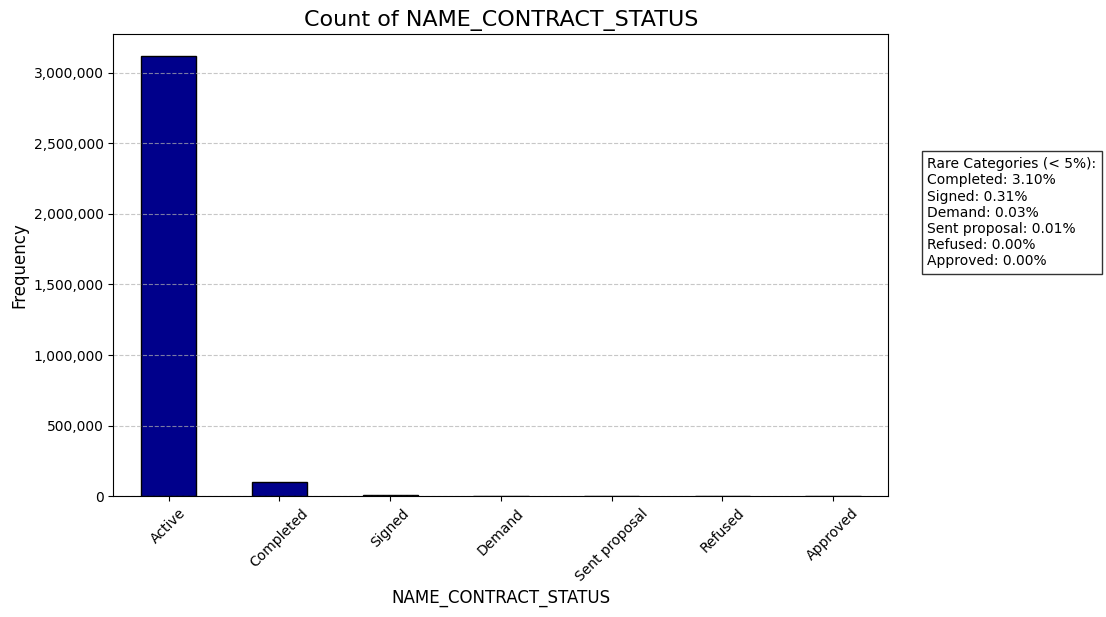

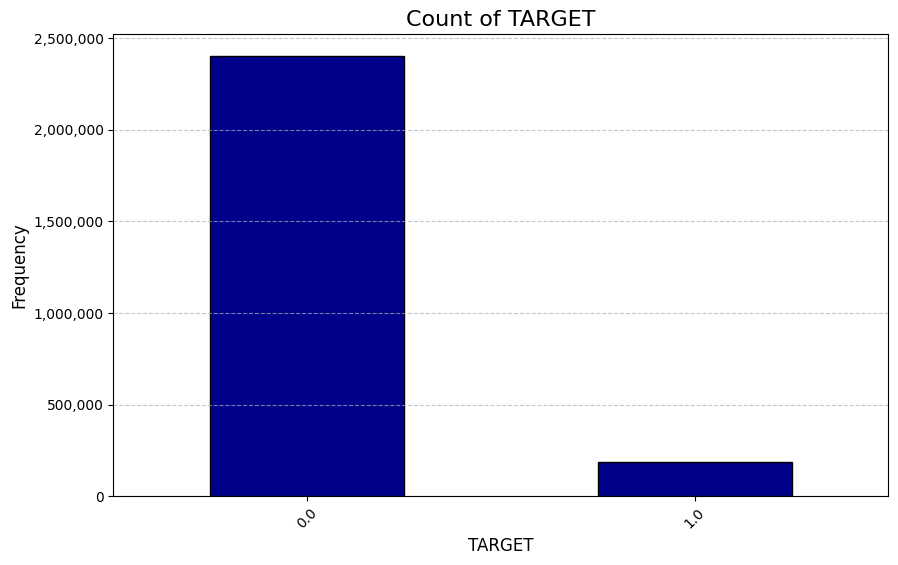

In [7]:
visualize_cate_with_rare_and_binary(credit_app, 5)

#### Heatmap

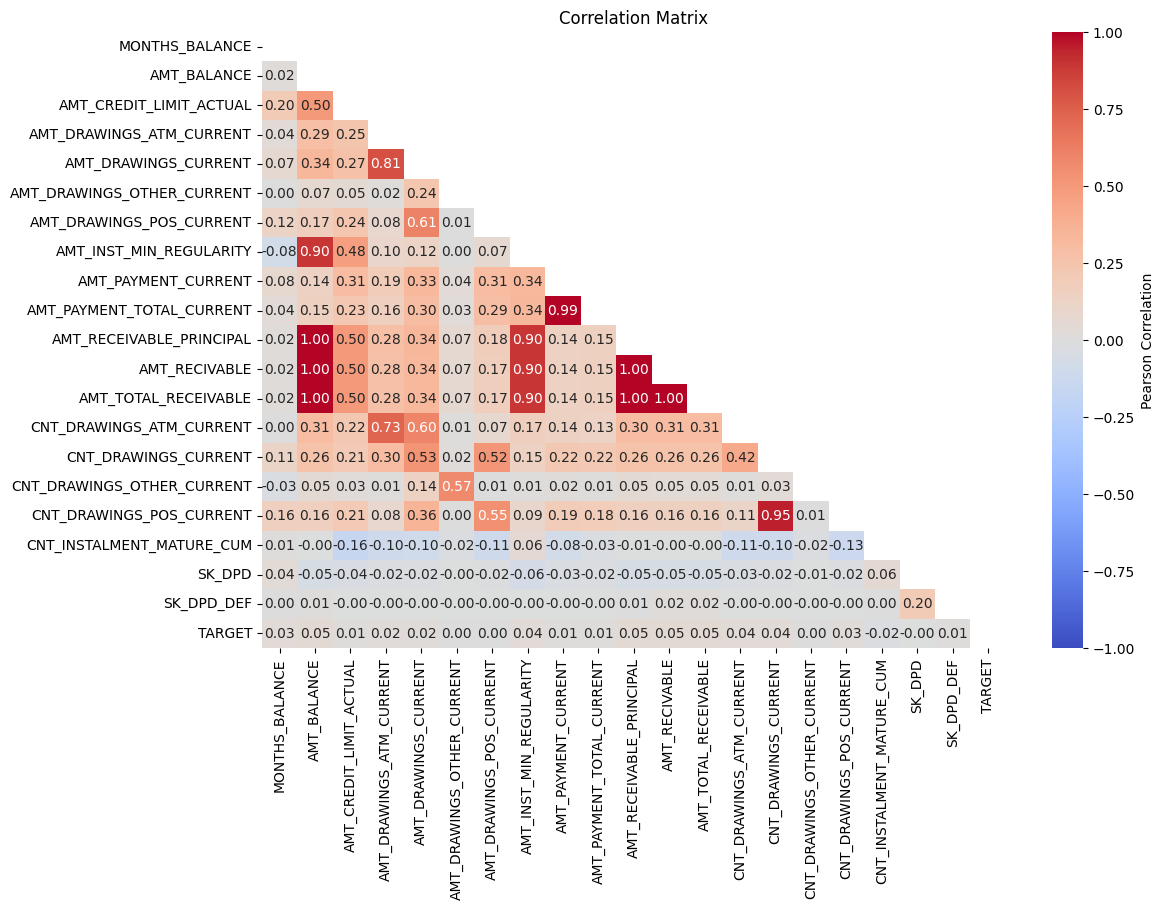


Strong correlations above threshold:
                     Variable 1                  Variable 2  Correlation
165               AMT_RECIVABLE        AMT_TOTAL_RECEIVABLE     0.999995
29                  AMT_BALANCE               AMT_RECIVABLE     0.999915
30                  AMT_BALANCE        AMT_TOTAL_RECEIVABLE     0.999894
155    AMT_RECEIVABLE_PRINCIPAL               AMT_RECIVABLE     0.999715
28                  AMT_BALANCE    AMT_RECEIVABLE_PRINCIPAL     0.999710
156    AMT_RECEIVABLE_PRINCIPAL        AMT_TOTAL_RECEIVABLE     0.999689
132         AMT_PAYMENT_CURRENT   AMT_PAYMENT_TOTAL_CURRENT     0.994418
190        CNT_DRAWINGS_CURRENT    CNT_DRAWINGS_POS_CURRENT     0.948367
122     AMT_INST_MIN_REGULARITY               AMT_RECIVABLE     0.896606
123     AMT_INST_MIN_REGULARITY        AMT_TOTAL_RECEIVABLE     0.896580
25                  AMT_BALANCE     AMT_INST_MIN_REGULARITY     0.895695
121     AMT_INST_MIN_REGULARITY    AMT_RECEIVABLE_PRINCIPAL     0.895024
57     AMT_DR

In [8]:
correlation_matrix(credit_app)

In [ ]:
analyze_numeric_relationships(credit_app)


Generating pairplot for numerical variables...


### Analyze the relationship between target and other features

In [ ]:
credit_app.columns

Index(['SK_ID_PREV', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF', 'SK_ID_CURR', 'TARGET'],
      dtype='object')

In [ ]:
list_train_col = ['SK_ID_PREV', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF', 'SK_ID_CURR']

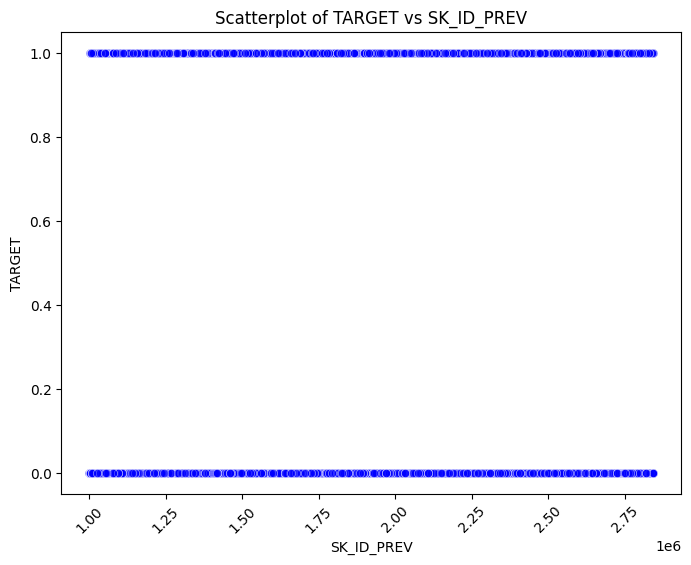

T-test Results for SK_ID_PREV vs TARGET: t-stat: 2.5967, p-value: 0.0094
There is a statistically significant relationship.



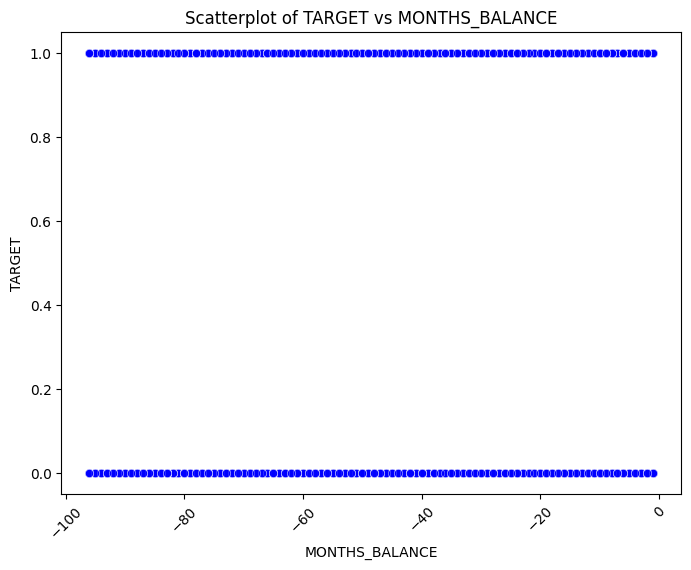

T-test Results for MONTHS_BALANCE vs TARGET: t-stat: 56.6375, p-value: 0.0000
There is a statistically significant relationship.



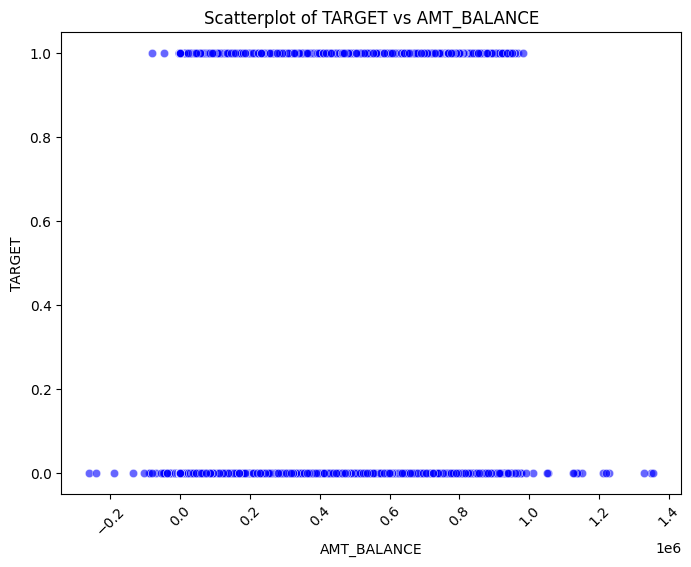

T-test Results for AMT_BALANCE vs TARGET: t-stat: 66.8131, p-value: 0.0000
There is a statistically significant relationship.



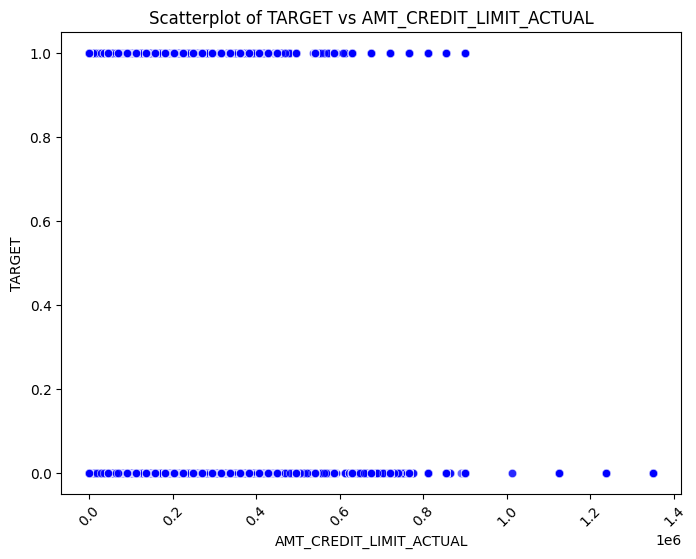

T-test Results for AMT_CREDIT_LIMIT_ACTUAL vs TARGET: t-stat: 18.4957, p-value: 0.0000
There is a statistically significant relationship.



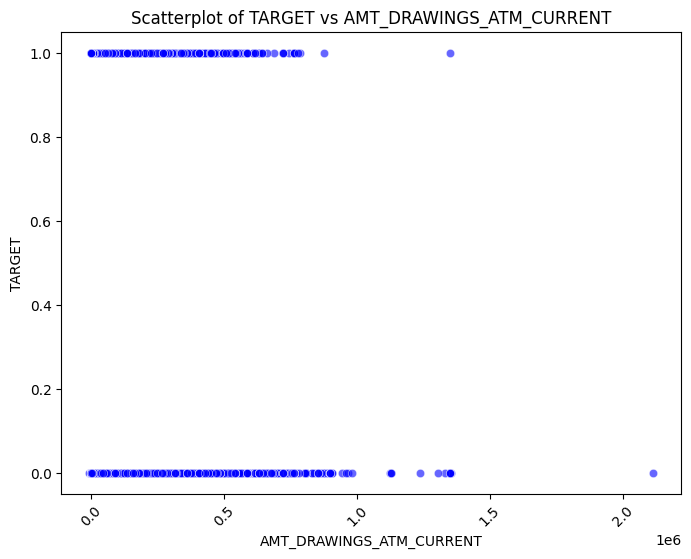

T-test Results for AMT_DRAWINGS_ATM_CURRENT vs TARGET: t-stat: 29.2598, p-value: 0.0000
There is a statistically significant relationship.



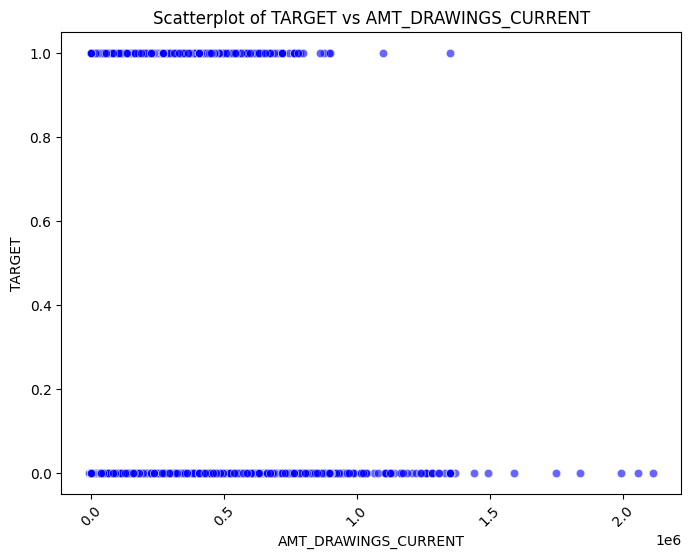

T-test Results for AMT_DRAWINGS_CURRENT vs TARGET: t-stat: 30.8113, p-value: 0.0000
There is a statistically significant relationship.



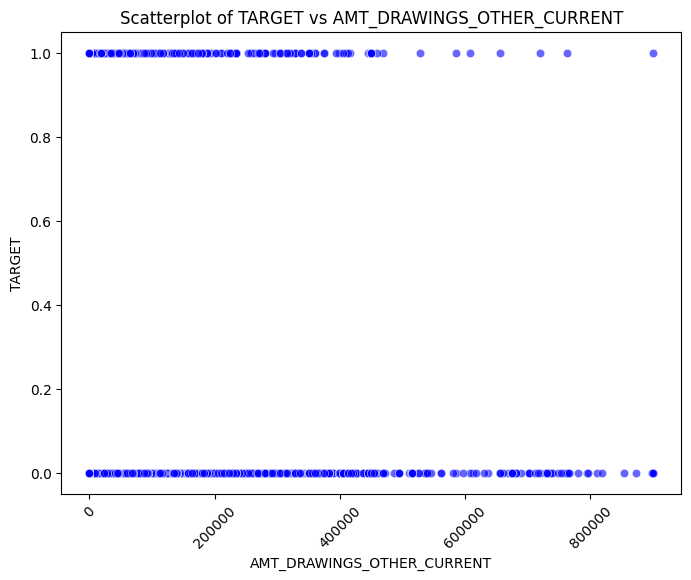

T-test Results for AMT_DRAWINGS_OTHER_CURRENT vs TARGET: t-stat: 4.4863, p-value: 0.0000
There is a statistically significant relationship.



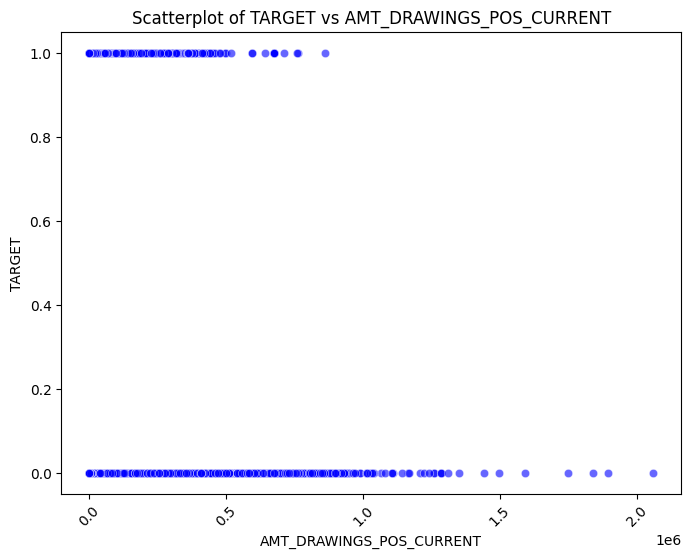

T-test Results for AMT_DRAWINGS_POS_CURRENT vs TARGET: t-stat: 7.8523, p-value: 0.0000
There is a statistically significant relationship.



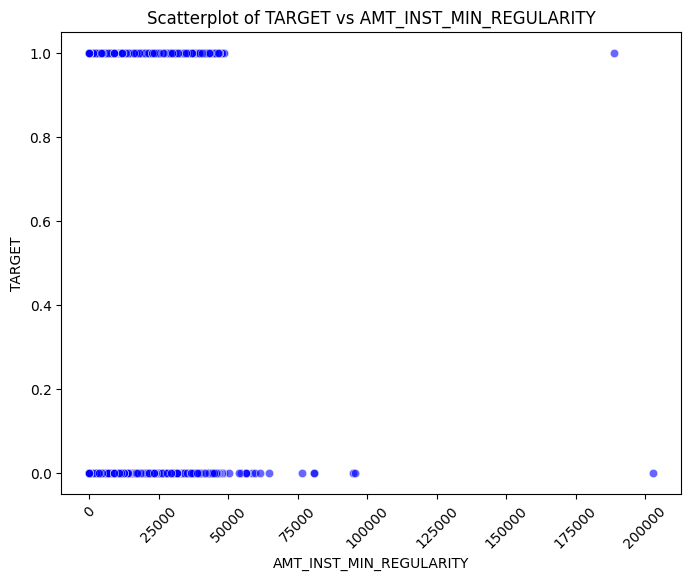

T-test Results for AMT_INST_MIN_REGULARITY vs TARGET: t-stat: 51.9726, p-value: 0.0000
There is a statistically significant relationship.



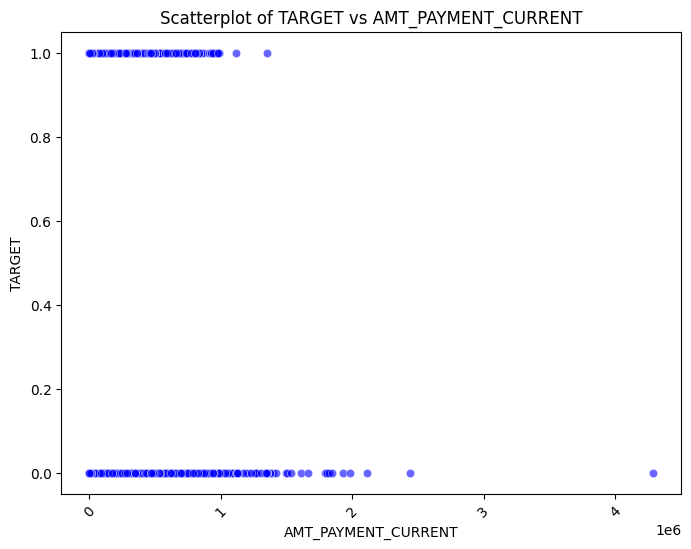

T-test Results for AMT_PAYMENT_CURRENT vs TARGET: t-stat: 15.4858, p-value: 0.0000
There is a statistically significant relationship.



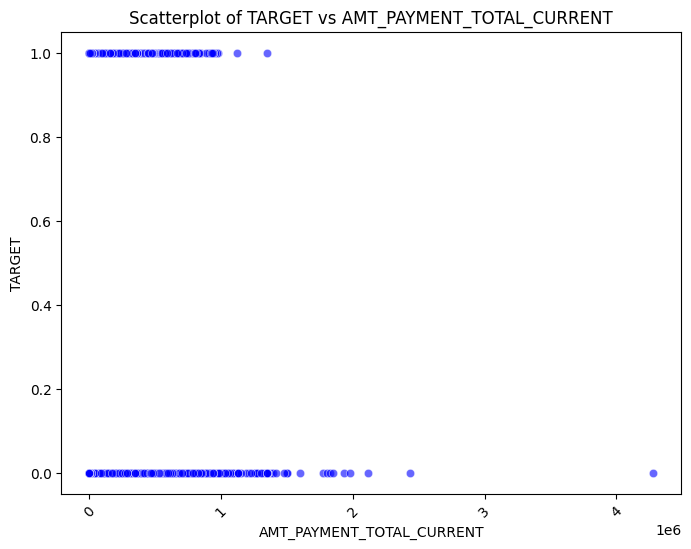

T-test Results for AMT_PAYMENT_TOTAL_CURRENT vs TARGET: t-stat: 16.2594, p-value: 0.0000
There is a statistically significant relationship.



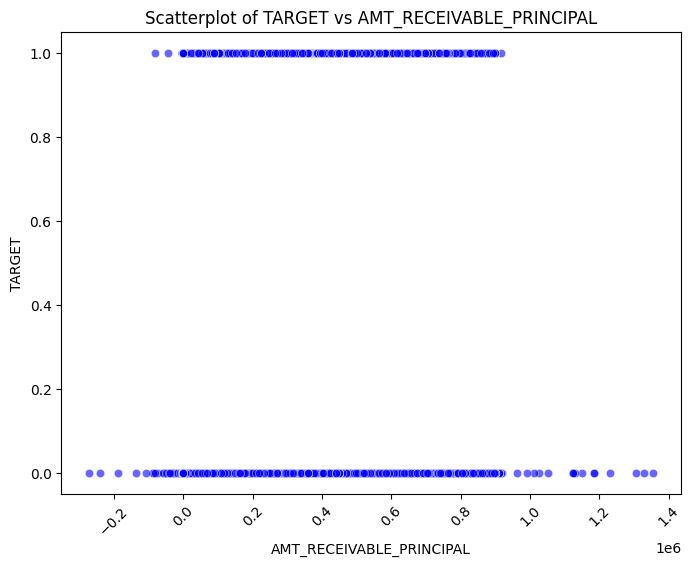

T-test Results for AMT_RECEIVABLE_PRINCIPAL vs TARGET: t-stat: 66.3055, p-value: 0.0000
There is a statistically significant relationship.



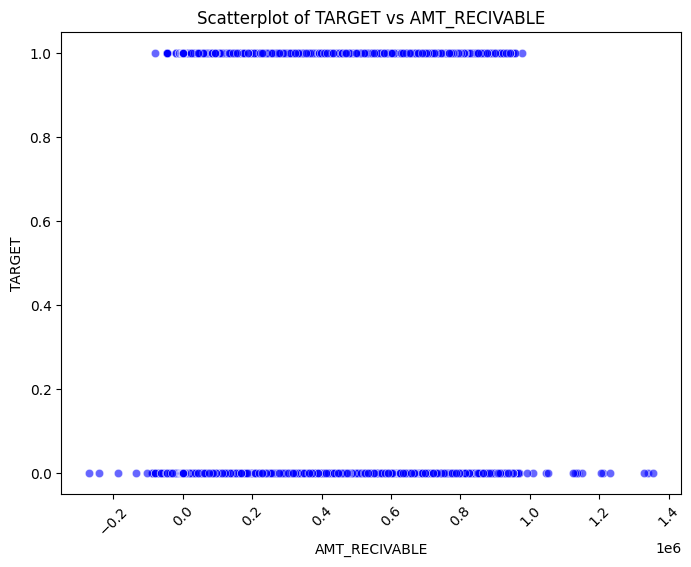

T-test Results for AMT_RECIVABLE vs TARGET: t-stat: 66.5107, p-value: 0.0000
There is a statistically significant relationship.



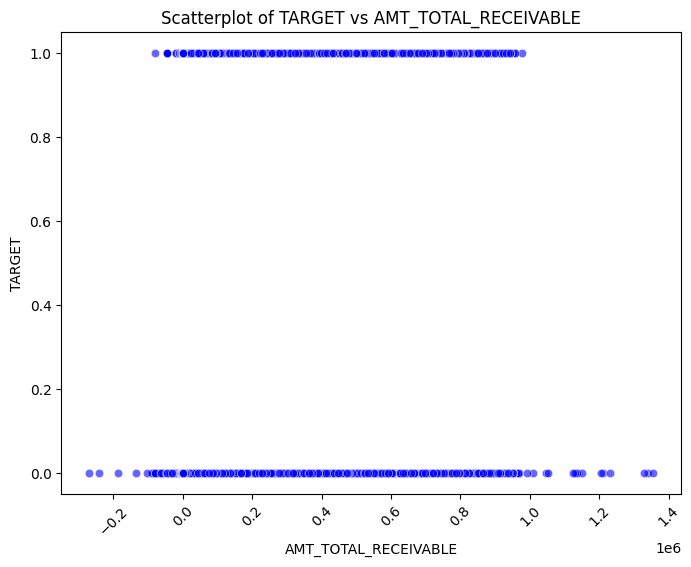

T-test Results for AMT_TOTAL_RECEIVABLE vs TARGET: t-stat: 66.5730, p-value: 0.0000
There is a statistically significant relationship.



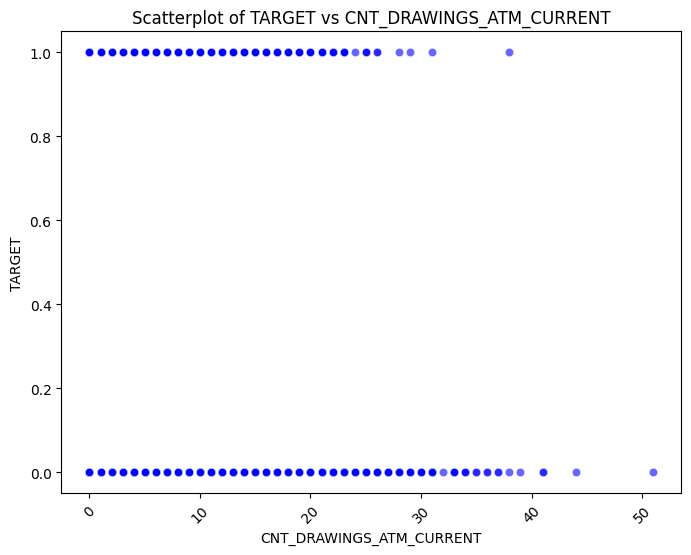

T-test Results for CNT_DRAWINGS_ATM_CURRENT vs TARGET: t-stat: 43.3070, p-value: 0.0000
There is a statistically significant relationship.



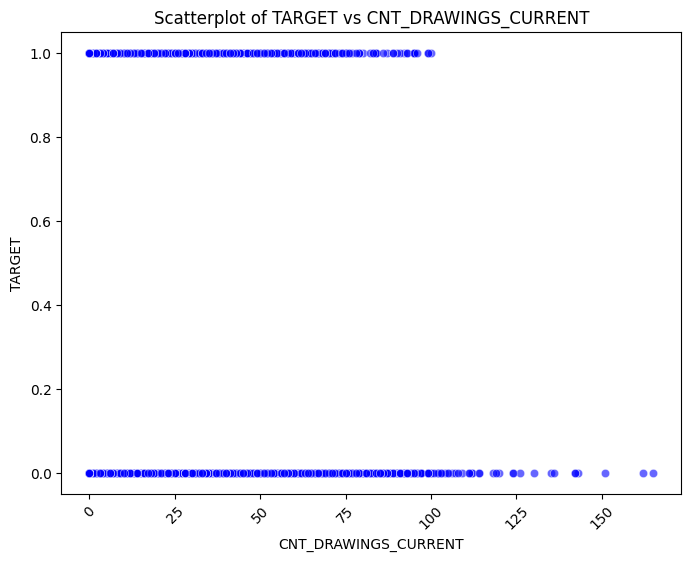

T-test Results for CNT_DRAWINGS_CURRENT vs TARGET: t-stat: 46.4724, p-value: 0.0000
There is a statistically significant relationship.



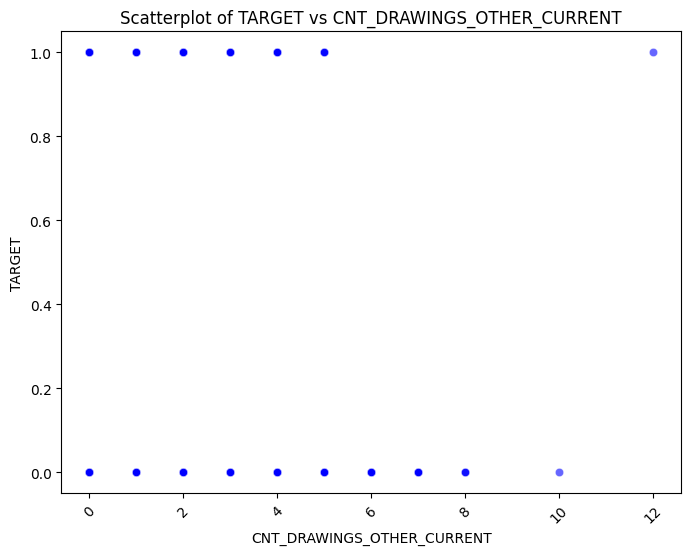

T-test Results for CNT_DRAWINGS_OTHER_CURRENT vs TARGET: t-stat: 3.2359, p-value: 0.0012
There is a statistically significant relationship.



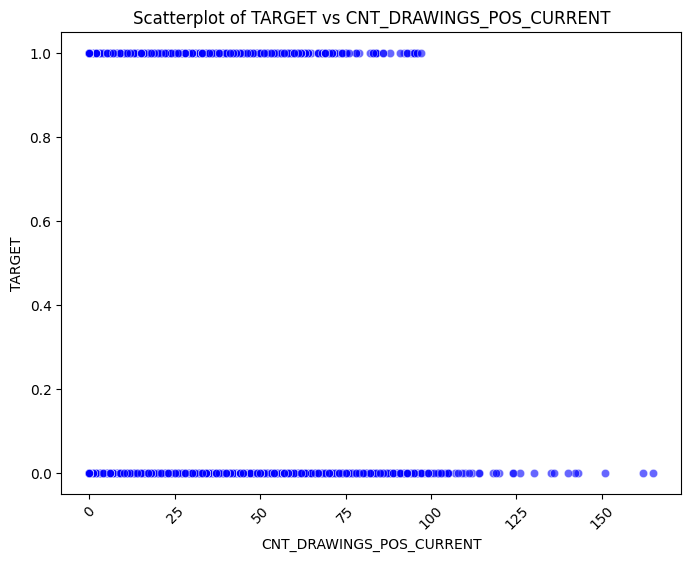

T-test Results for CNT_DRAWINGS_POS_CURRENT vs TARGET: t-stat: 33.9690, p-value: 0.0000
There is a statistically significant relationship.



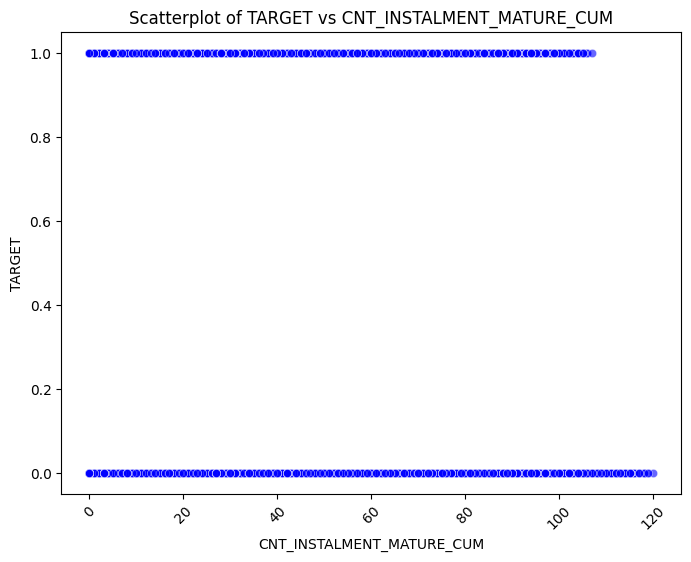

T-test Results for CNT_INSTALMENT_MATURE_CUM vs TARGET: t-stat: -35.1371, p-value: 0.0000
There is a statistically significant relationship.



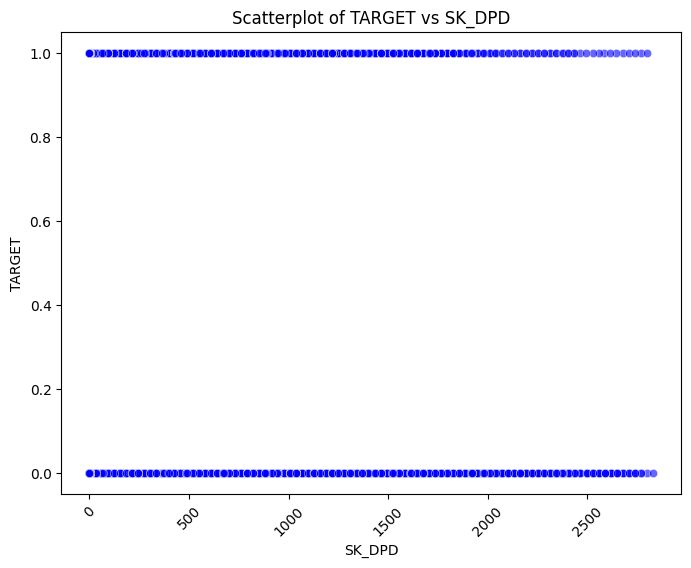

T-test Results for SK_DPD vs TARGET: t-stat: -1.1651, p-value: 0.2440
No statistically significant relationship.



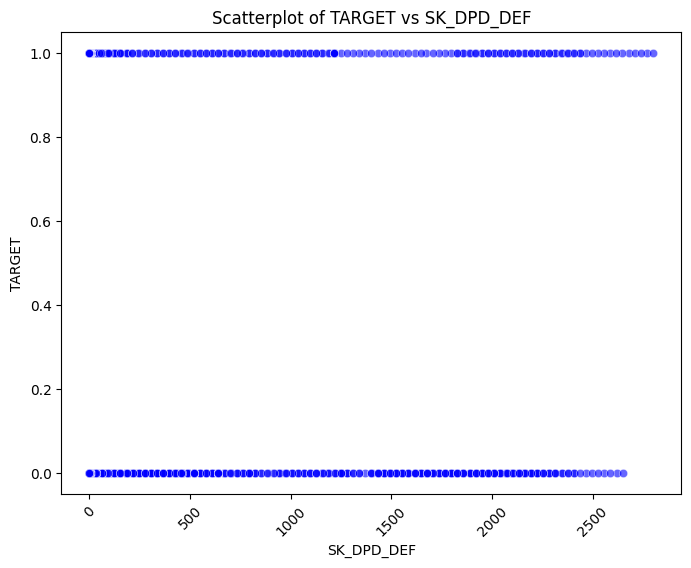

T-test Results for SK_DPD_DEF vs TARGET: t-stat: 9.8393, p-value: 0.0000
There is a statistically significant relationship.



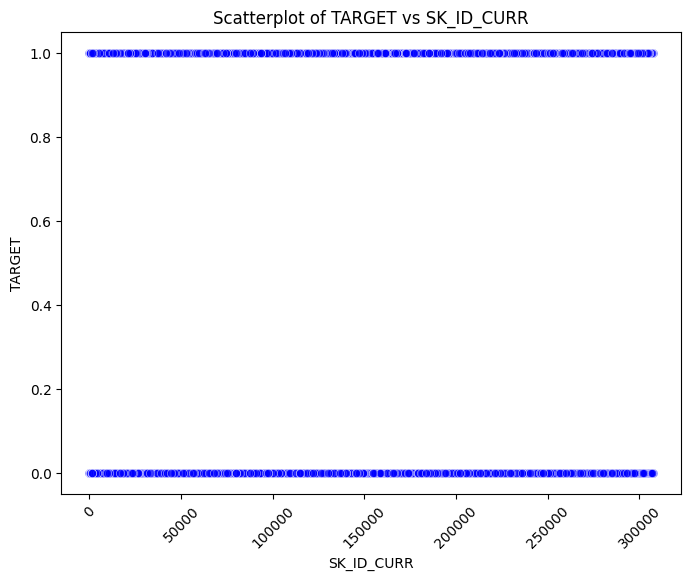

T-test Results for SK_ID_CURR vs TARGET: t-stat: -9.5673, p-value: 0.0000
There is a statistically significant relationship.



c:\Users\Tran Duy Anh\Documents\Danh đang học\NEU Study\Third year\First term\Data Preparation and Visualization\Final\final\eda_combined.py:464: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
c:\Users\Tran Duy Anh\Documents\Danh đang học\NEU Study\Third year\First term\Data Preparation and Visualization\Final\final\eda_combined.py:464: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


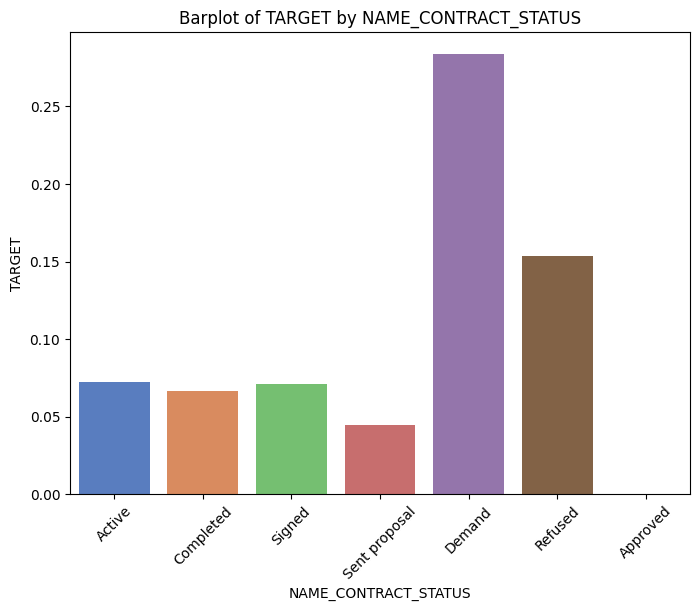

Chi-square Test Results for NAME_CONTRACT_STATUS vs TARGET: Chi2: 441.6542, p-value: 0.0000
There is a statistically significant relationship.



In [ ]:
analyze_target_relationship(credit_app, 'TARGET', list_train_col)

#### The above scatter plots show that non defaulters (0) tend to have higher credit total drawing amount, payment amount, total count of drawings, and total completed installment terms. However, the number of days past due in this group is higher than that of defaulters. In addition, the receivable amount, credit amount balance, and credit limit actual is similar for both groups.

### Check outlier


=== Outlier Detection and Handling ===


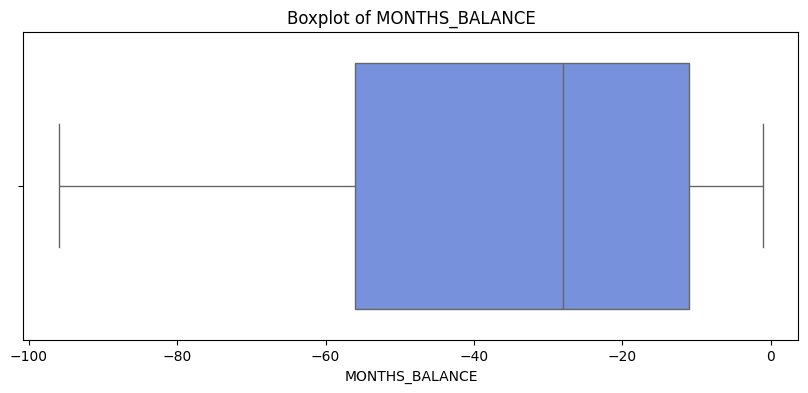

No outliers detected in column MONTHS_BALANCE.


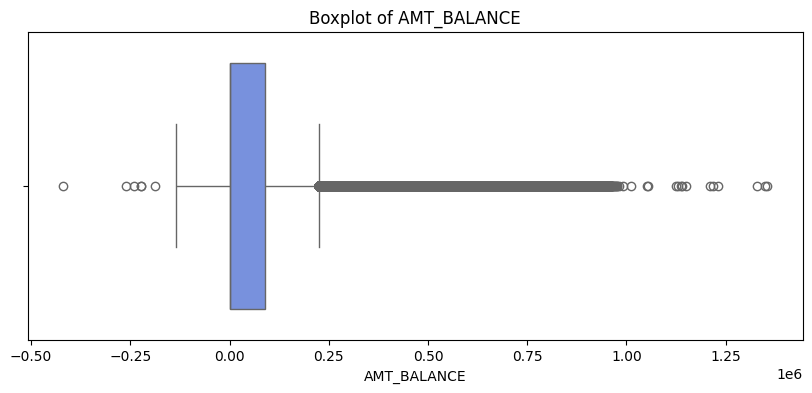

Outliers detected in column AMT_BALANCE: 86832 rows


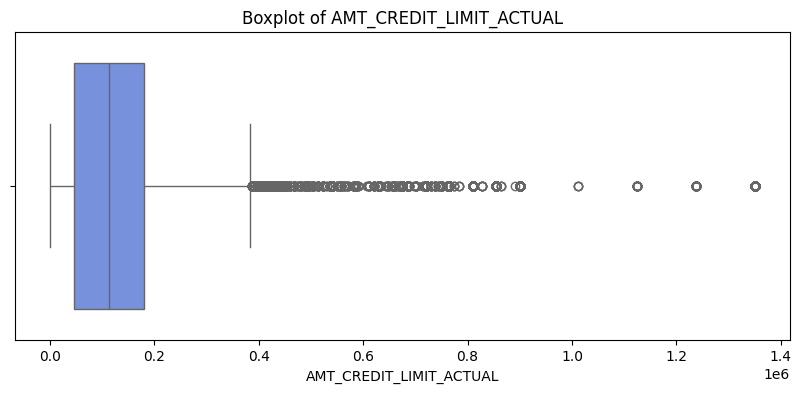

Outliers detected in column AMT_CREDIT_LIMIT_ACTUAL: 84700 rows


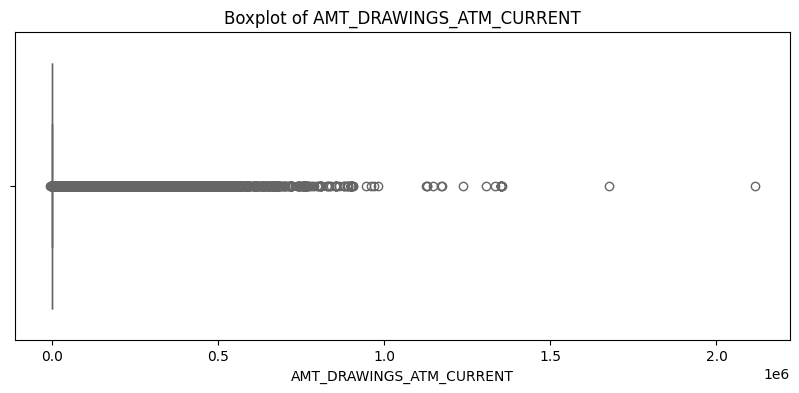

Outliers detected in column AMT_DRAWINGS_ATM_CURRENT: 48098 rows


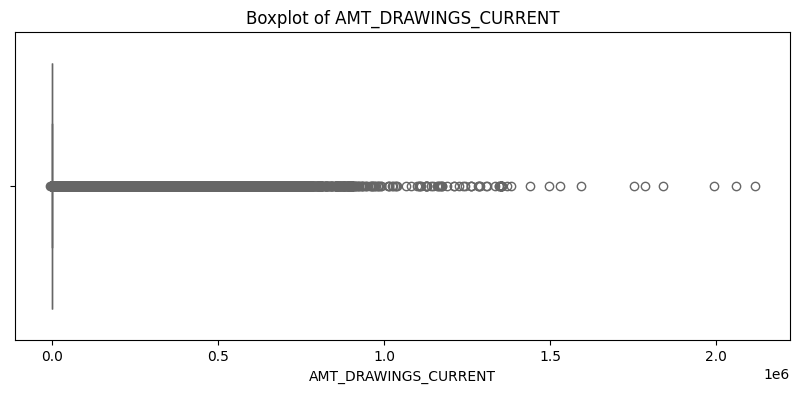

Outliers detected in column AMT_DRAWINGS_CURRENT: 63402 rows


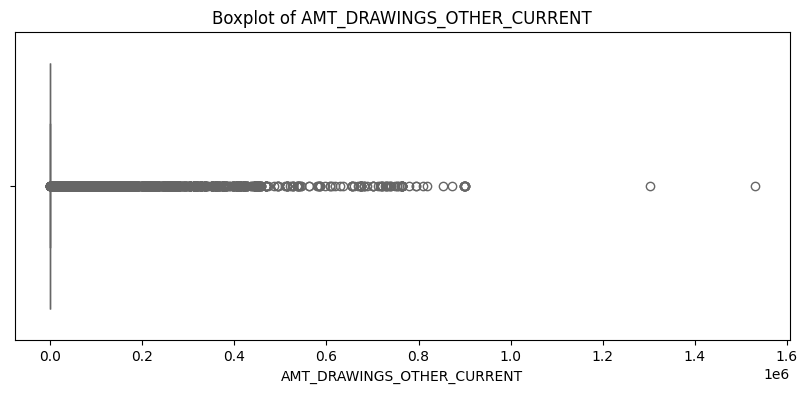

Outliers detected in column AMT_DRAWINGS_OTHER_CURRENT: 5685 rows


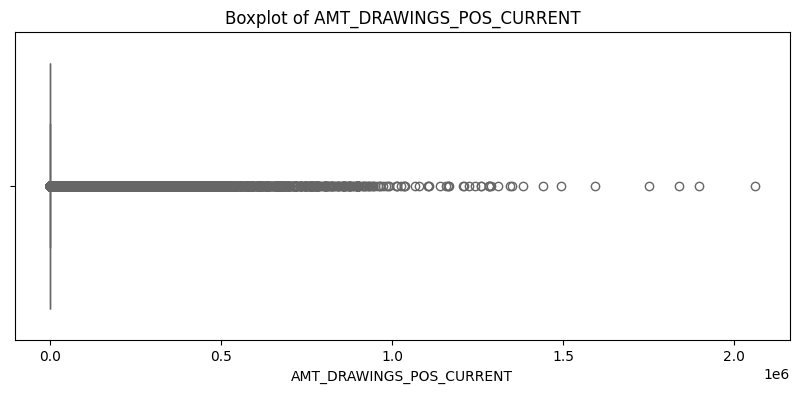

Outliers detected in column AMT_DRAWINGS_POS_CURRENT: 32294 rows


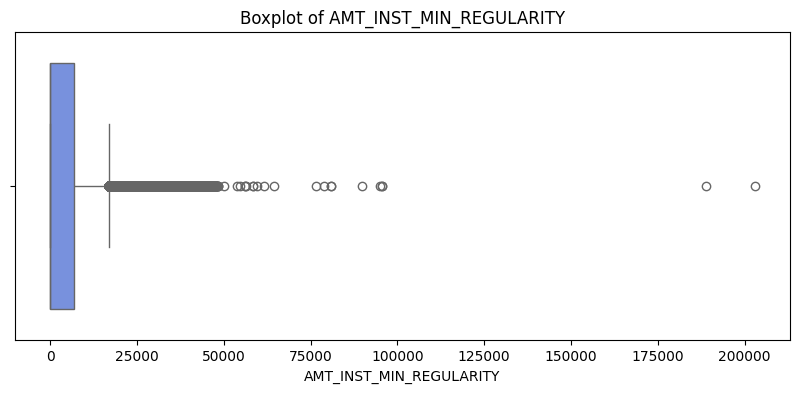

Outliers detected in column AMT_INST_MIN_REGULARITY: 75359 rows


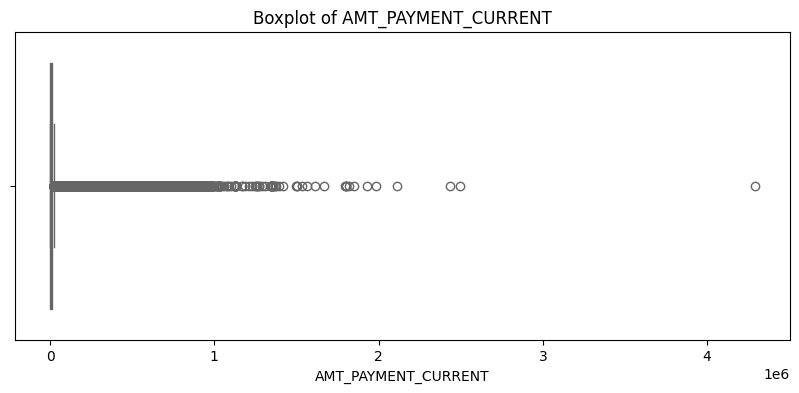

Outliers detected in column AMT_PAYMENT_CURRENT: 35734 rows


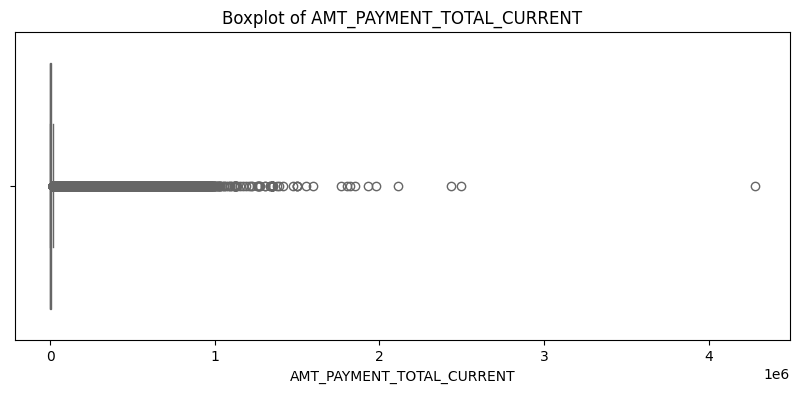

Outliers detected in column AMT_PAYMENT_TOTAL_CURRENT: 39908 rows


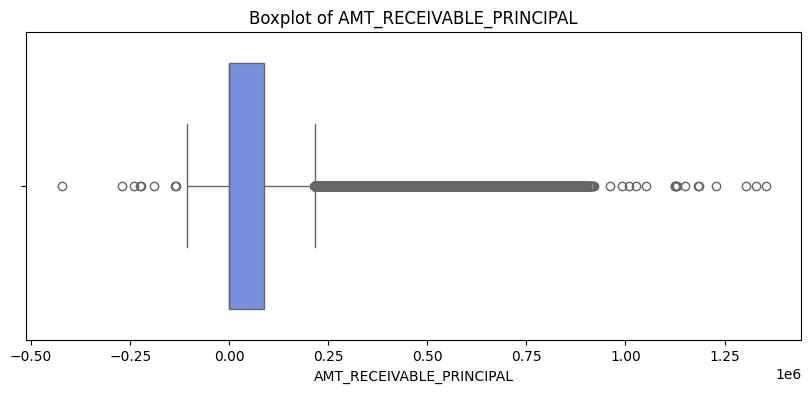

Outliers detected in column AMT_RECEIVABLE_PRINCIPAL: 86945 rows


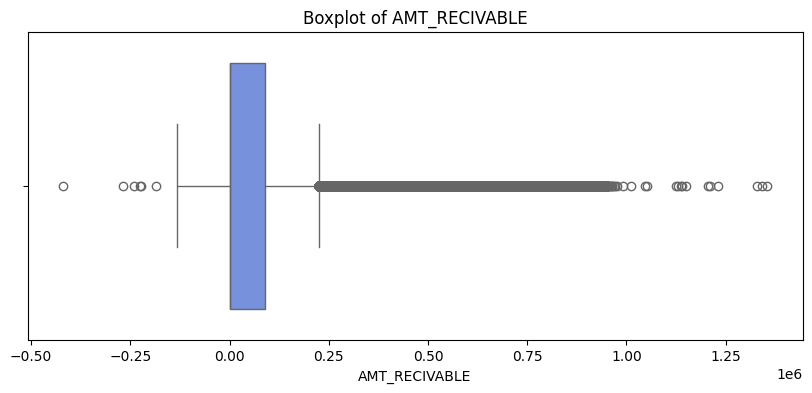

Outliers detected in column AMT_RECIVABLE: 86702 rows


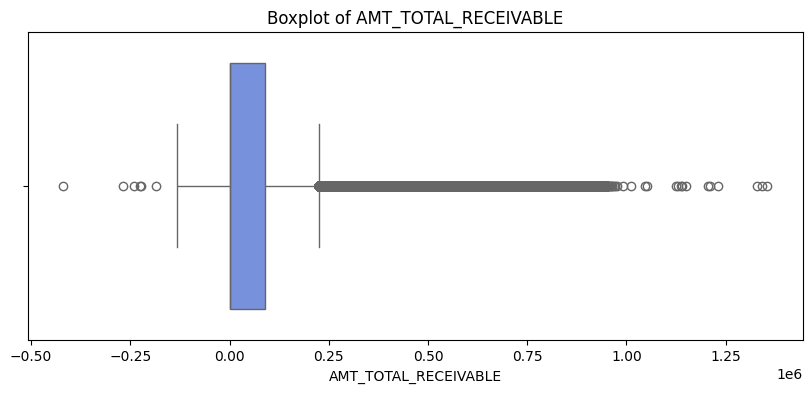

Outliers detected in column AMT_TOTAL_RECEIVABLE: 86699 rows


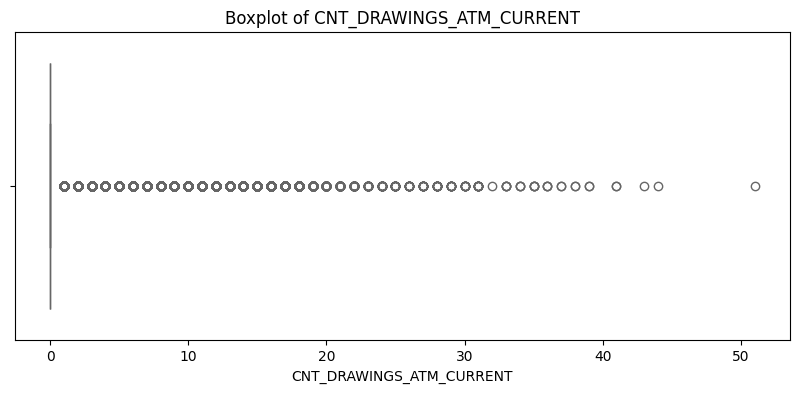

Outliers detected in column CNT_DRAWINGS_ATM_CURRENT: 59862 rows


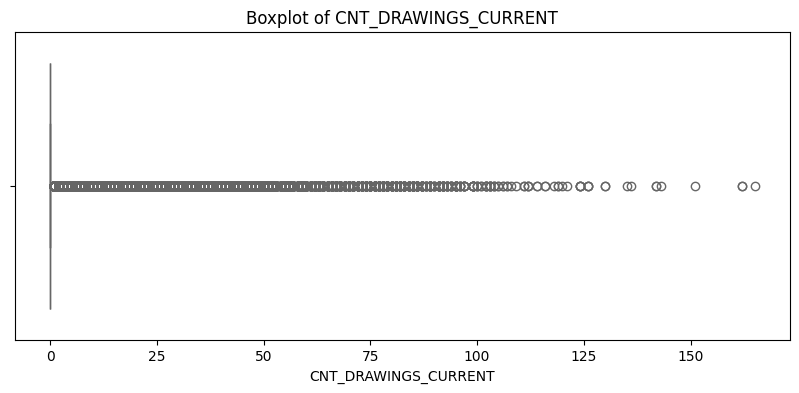

Outliers detected in column CNT_DRAWINGS_CURRENT: 48358 rows


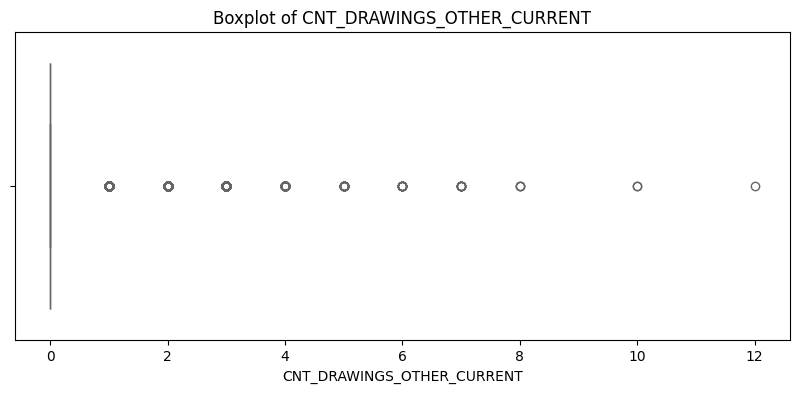

Outliers detected in column CNT_DRAWINGS_OTHER_CURRENT: 11273 rows


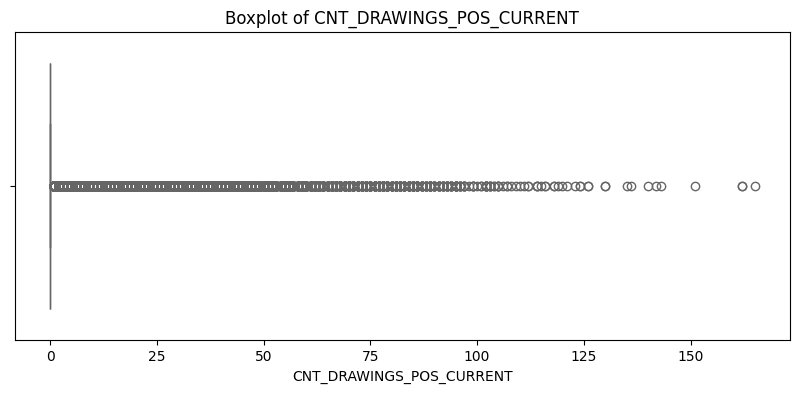

Outliers detected in column CNT_DRAWINGS_POS_CURRENT: 38595 rows


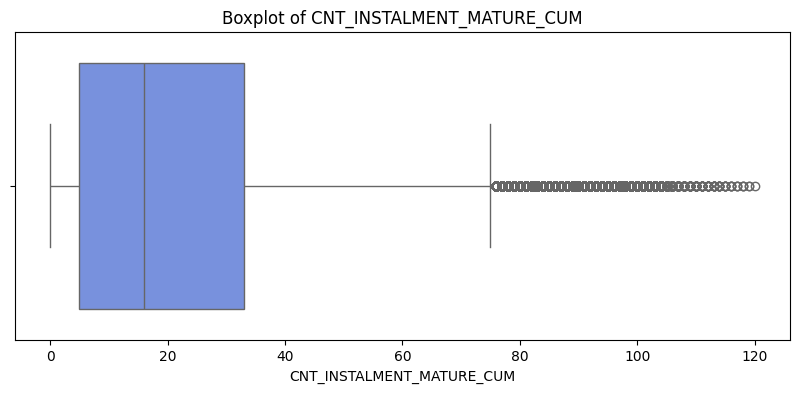

Outliers detected in column CNT_INSTALMENT_MATURE_CUM: 24037 rows


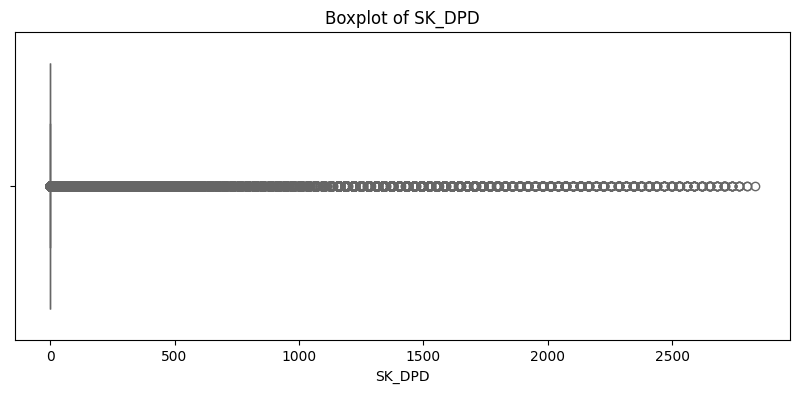

Outliers detected in column SK_DPD: 32458 rows


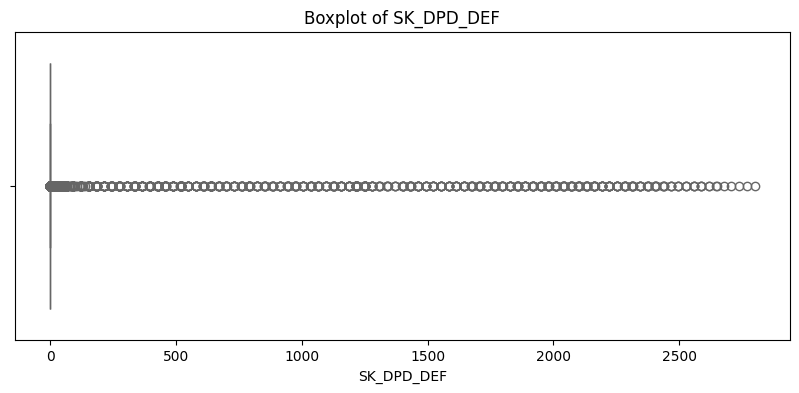

Outliers detected in column SK_DPD_DEF: 896 rows


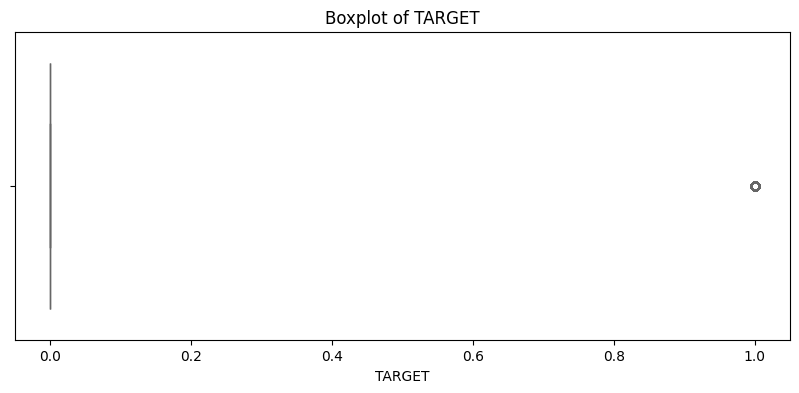

Outliers detected in column TARGET: 187032 rows


In [ ]:
checking_outlier(credit_app)

#### AMT_BALANCE and 3 RECEIVABLE columns experience negative outliers. This is unreasonable and will be noted to clean them afterward 


=== Checking for Imbalanced Columns ===
Column 'NAME_CONTRACT_STATUS' is imbalanced:
NAME_CONTRACT_STATUS
Active           0.965523
Completed        0.030989
Signed           0.003079
Demand           0.000261
Sent proposal    0.000143
Refused          0.000004
Approved         0.000002
Name: proportion, dtype: float64


c:\Users\Tran Duy Anh\Documents\Danh đang học\NEU Study\Third year\First term\Data Preparation and Visualization\Final\final\eda_combined.py:299: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")


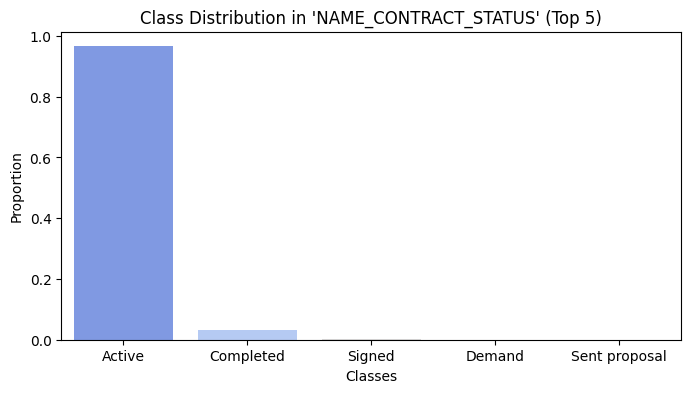

In [ ]:
checking_imbalance(credit_app, target= 'TARGET')

#### The class distribution is heavily imbalance


=== Low-Variance Feature Detection ===


c:\Users\Tran Duy Anh\Documents\Danh đang học\NEU Study\Third year\First term\Data Preparation and Visualization\Final\final\eda_combined.py:332: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numeric_cols, y=variances, palette="viridis")


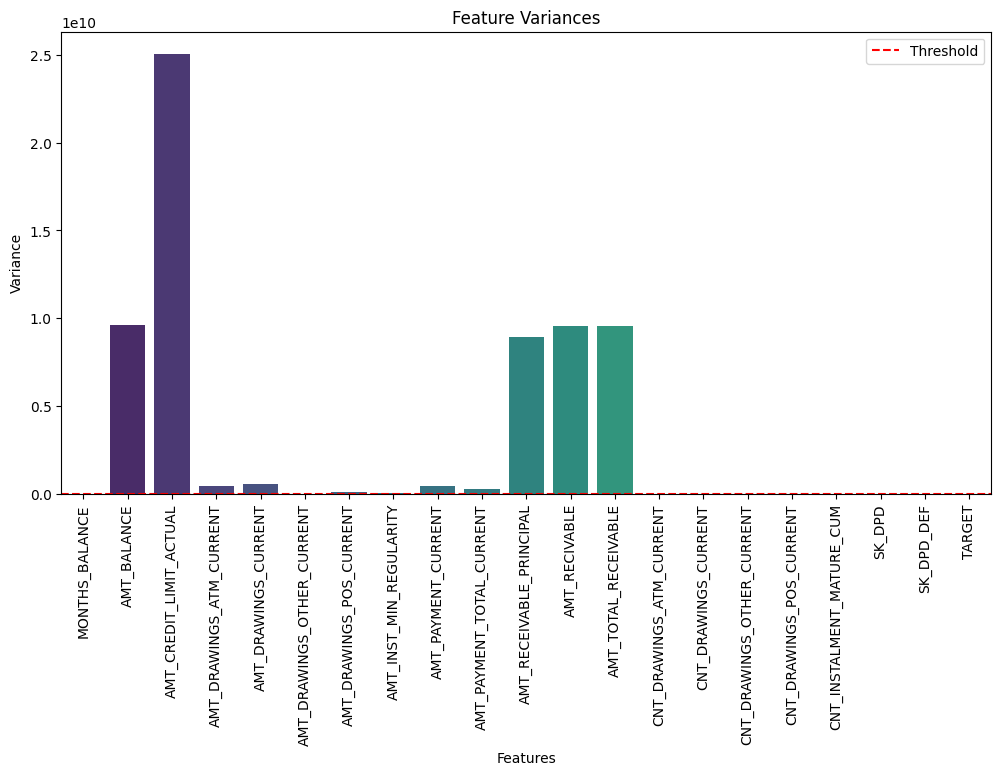

Low-variance columns to be removed: ['AMT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT']


['AMT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT']

In [ ]:
low_variance(credit_app)

#### AMT_DRAWINGS_OTHER_CURRENT and CNT_DRAWINGS_OTHER_CURRENT columns are detected to be low-variance. We will check for other conditions to determine whether to remove or consider alternative uses afterward